## LABORATORIO 1

### Security Data Science

- Alejandra Guzmán: 20262 ✨👩‍💻
- Eduardo Ramirez:  ✨👨‍💻

Universidad: Universidad del Valle
Clase: Security Data Science


In [1]:
import pandas as pd


dataset_path = 'dataset_pishing.csv'
df = pd.read_csv(dataset_path)

df.head()

,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate


In [2]:
status_counts = df['status'].value_counts()

status_counts

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

El dataset contiene 5715 observaciones etiquetadas como "legitimate" y 5715 observaciones etiquetadas como "phishing". Esto indica que el dataset por lo tanto se puede considerar como balanceado.

### ¿Qué ventajas tiene el análisis de una URL contra el análisis de otros datos, cómo el tiempo de vida del dominio, o las características de la página Web?

- Se puede mencionar la capacidad de detectar phishing sin necesidad de acceder al contenido de la página, lo cual permite realizar detecciones en tiempo real. Lo cual se debe a que las URL pueden contener indicadores únicos de phishing, independientemente de las tácticas de ocultamiento dentro del contenido de la página.


### ¿Qué características de una URL son más prometedoras para la detección de phishing?

- Las características de una URL prometedoras para la detección de phishing incluyen el uso de caracteres no alfanuméricos (NAN), como puntos extra, "//" para redirigir a un dominio completamente diferente, "-" en el dominio para imitar un nombre de sitio web similar y símbolos innecesarios. Estos elementos sugieren que la distribución de estos caracteres puede impactar significativamente en la clasificación de sitios web como phishing o legítimos.

- Longitud de la URL: URLs más largas pueden ser sospechosas.
- Uso de HTTPS: La ausencia de HTTPS puede ser un indicador de phishing.
- Presencia de IP: URLs con direcciones IP en lugar de nombres de dominio pueden ser sospechosas.
- Número de puntos: Un número excesivo de puntos puede indicar intentos de engaño.
- Presencia de "@": El símbolo "@" se usa para engañar sobre el verdadero dominio.
- Uso de guiones: Los guiones se utilizan frecuentemente en URLs phishing para imitar a dominios legítimos.
- Número de subdominios: Un alto número de subdominios puede ser sospechoso.
- Presencia de palabras clave sensibles: Palabras como "login", "update", "verify" pueden indicar intentos de phishing.
- Longitud del path: Un path muy largo puede ser sospechoso.
- Número de caracteres no alfanuméricos: Un exceso puede ser indicativo de URLs maliciosas.
- Uso de puertos no estándar: La presencia de puertos no estándar en la URL puede ser un indicador de phishing.
- Entropía de caracteres: Medir la complejidad de la URL puede ayudar a detectar patrones sospechosos.
- Presencia de dominios de nivel superior (TLD) sospechosos: Algunos TLD son más comunes en URLs de phishing.
- Número de parámetros en la query: URLs con muchos parámetros pueden ser sospechosas.
- Presencia de fragmentos: La utilización de fragmentos en la URL puede ser un indicador de comportamiento malicioso.

In [3]:
from urllib.parse import urlparse, parse_qs
import re


def url_length(url):
    return len(url)

def using_https(url):
    return 1 if urlparse(url).scheme == 'https' else 0

def presence_of_ip(url):
    return 1 if re.search(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', url) else 0

def number_of_dots(url):
    return url.count('.')

def presence_of_at_symbol(url):
    return 1 if "@" in url else 0

def usage_of_hyphen(url):
    return 1 if "-" in url else 0

def number_of_subdomains(url):
    return len(urlparse(url).netloc.split('.')) - 2  

def presence_of_sensitive_words(url):
    sensitive_words = ['login', 'update', 'verify']
    return 1 if any(word in url for word in sensitive_words) else 0

def path_length(url):
    return len(urlparse(url).path)

def number_of_non_alphanumeric_characters(url):
    return len(re.findall(r'\W', url))

def usage_of_non_standard_ports(url):
    port = urlparse(url).port
    return 1 if port and port not in [80, 443] else 0

def entropy_of_characters(url):
 
    prob = [float(url.count(c)) / len(url) for c in dict.fromkeys(list(url))]
    entropy = - sum([p * (p / len(url)) for p in prob])
    return entropy

def presence_of_suspicious_tld(url):
    suspicious_tlds = ['.biz', '.info', '.top', '.xyz']
    return 1 if any(url.endswith(tld) for tld in suspicious_tlds) else 0

def number_of_parameters(url):
    return len(parse_qs(urlparse(url).query))

def presence_of_fragments(url):
    return 1 if urlparse(url).fragment else 0

# Aplicar las funciones al dataset
features = ['url_length', 'using_https', 'presence_of_ip', 'number_of_dots',
            'presence_of_at_symbol', 'usage_of_hyphen', 'number_of_subdomains',
            'presence_of_sensitive_words', 'path_length',
            'number_of_non_alphanumeric_characters', 'usage_of_non_standard_ports',
            'entropy_of_characters', 'presence_of_suspicious_tld',
            'number_of_parameters', 'presence_of_fragments']

for feature in features:
    df[feature] = df['url'].apply(globals()[feature])

df.head()

,url,status,url_length,using_https,presence_of_ip,number_of_dots,presence_of_at_symbol,usage_of_hyphen,number_of_subdomains,presence_of_sensitive_words,path_length,number_of_non_alphanumeric_characters,usage_of_non_standard_ports,entropy_of_characters,presence_of_suspicious_tld,number_of_parameters,presence_of_fragments
0,http://www.crestonwood.com/router.php,legitimate,37,0,0,3,0,0,1,0,11,7,0,-0.002191,0,0,0
1,http://shadetreetechnology.com/V4/validation/a...,phishing,77,0,0,1,0,0,0,0,47,7,0,-0.000778,0,0,0
2,https://support-appleld.com.secureupdate.duila...,phishing,126,1,0,4,0,1,3,1,20,17,0,-0.000340,0,3,0
3,http://rgipt.ac.in,legitimate,18,0,0,2,0,0,1,0,0,5,0,-0.005487,0,0,0
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,55,0,0,2,0,1,1,0,33,10,0,-0.001196,0,0,0


In [20]:

data = pd.read_csv(dataset_path)

def url_length(url):
    return len(url)

def https_usage(url):
    return 1 if url.startswith('https://') else 0

def count_subdomains(url):

    return url.count('.') - (1 if url.startswith('www.') else 0)

def special_chars(url):
    special_characters = ['@', '?']
    return sum(url.count(char) for char in special_characters)

data['url_length'] = data['url'].apply(url_length)
data['https'] = data['url'].apply(https_usage)
data['subdomains'] = data['url'].apply(count_subdomains)
data['special_chars'] = data['url'].apply(special_chars)

data['status'] = data['status'].map({'phishing': 1, 'legitimate': 0})


data_features = data.drop(columns=['url'])


data_features.head()


,status,url_length,https,subdomains,special_chars
0,0,37,0,3,0
1,1,77,0,1,0
2,1,126,1,4,1
3,0,18,0,2,0
4,0,55,0,2,0


In [22]:
from sklearn.model_selection import train_test_split


X = data_features.drop(columns=['status'])
y = data_features['status']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(30/45), random_state=42)


train_set = pd.concat([X_train, y_train], axis=1)
val_set = pd.concat([X_val, y_val], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

train_set.to_csv('training_set_features.csv', index=False)
val_set.to_csv('validation_set_features.csv', index=False)
test_set.to_csv('test_set_features.csv', index=False)

{
    "Training": train_set.shape,
    "Validation": val_set.shape,
    "Test": test_set.shape
}


{'Training': (6286, 5), 'Validation': (1714, 5), 'Test': (3430, 5)}

Regresión Logistica:


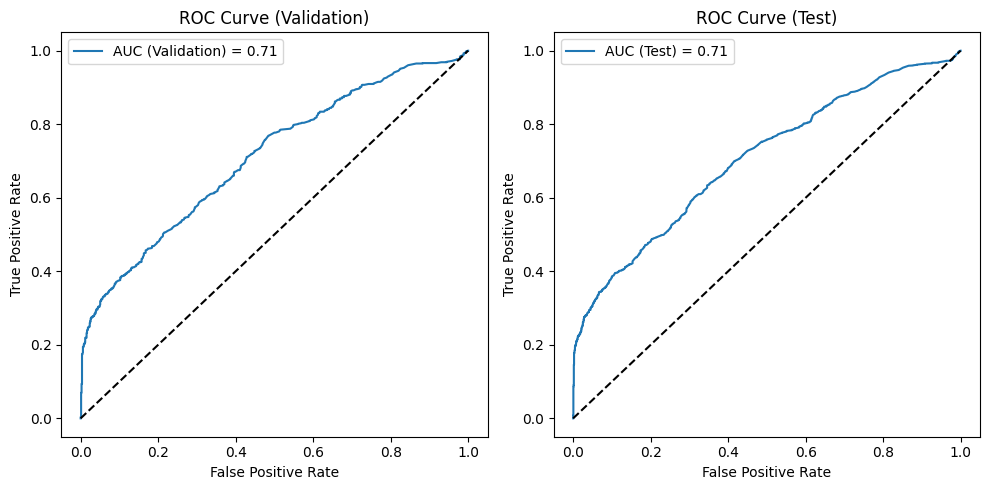


 Random Forest:


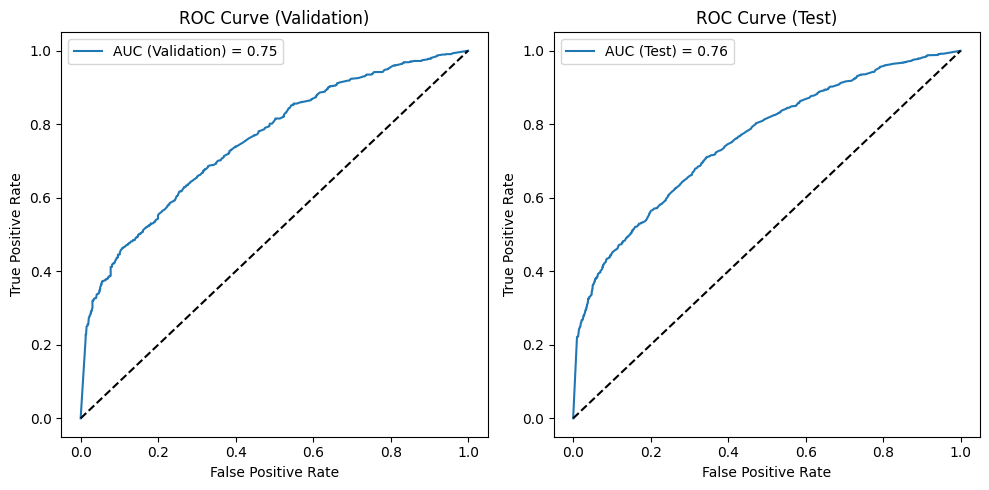

Regresion:  {'Validation': {'Confusion Matrix': array([[629, 223],
       [397, 465]], dtype=int64), 'Precision': 0.6758720930232558, 'Recall': 0.5394431554524362, 'AUC': 0.7090257126673422}, 'Test': {'Confusion Matrix': array([[1278,  437],
       [ 812,  903]], dtype=int64), 'Precision': 0.6738805970149254, 'Recall': 0.5265306122448979, 'AUC': 0.7055614582359391}}
Random Forest:  {'Validation': {'Confusion Matrix': array([[630, 222],
       [329, 533]], dtype=int64), 'Precision': 0.7059602649006622, 'Recall': 0.6183294663573086, 'AUC': 0.7543163077459342}, 'Test': {'Confusion Matrix': array([[1292,  423],
       [ 672, 1043]], dtype=int64), 'Precision': 0.7114597544338336, 'Recall': 0.6081632653061224, 'AUC': 0.7562578517454461}}


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    y_val_proba = model.predict_proba(X_val)[:,1]
    y_test_proba = model.predict_proba(X_test)[:,1]
    

    metrics = {
        "Validation": {
            "Confusion Matrix": confusion_matrix(y_val, y_val_pred),
            "Precision": precision_score(y_val, y_val_pred),
            "Recall": recall_score(y_val, y_val_pred),
            "AUC": roc_auc_score(y_val, y_val_proba)
        },
        "Test": {
            "Confusion Matrix": confusion_matrix(y_test, y_test_pred),
            "Precision": precision_score(y_test, y_test_pred),
            "Recall": recall_score(y_test, y_test_pred),
            "AUC": roc_auc_score(y_test, y_test_proba)
        }
    }
    

    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(fpr_val, tpr_val, label=f"AUC (Validation) = {metrics['Validation']['AUC']:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve (Validation)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(fpr_test, tpr_test, label=f"AUC (Test) = {metrics['Test']['AUC']:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve (Test)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return metrics


logistic_regression_model = LogisticRegression(max_iter=1000)
random_forest_model = RandomForestClassifier(n_estimators=100)


print("Regresión Logistica:")
lr_metrics = evaluate_model(logistic_regression_model, X_train, y_train, X_val, y_val, X_test, y_test)


print("\n Random Forest:")
rf_metrics = evaluate_model(random_forest_model, X_train, y_train, X_val, y_val, X_test, y_test)

print("Regresion: " , lr_metrics)
print("Random Forest: ",  rf_metrics)


### PREGUNTAS

- ¿Cuál es el impacto de clasificar un sitio de phishing como legítimo?

R//: Esto puede ser inconveniente (falso positivo) debido a que puede causarle daño a la reputación del sitio. Para el propietario del sitio, esto puede significar una disminución de tráfico en su página lo cual afectarían sus ingresos y reputación. 

- En base a las respuestas anteriores, ¿Qué métrica elegiría para comparar modelos similares de clasificación de phishing?

R//: Esto por el otro lado el impacto se puede considerar más grave, debido a que permite que los ataques sigan ocurriendo sin ser detectados, lo cual puede llevar a robo de identida, pérdidas financieras e incluso instalación de malware. Un falso positivo, puede significar poner en riesgo la seguridad y privacidad de los usuarios.

- ¿Qué modelo funcionó mejor para la clasificación de phishing? ¿Por qué?

R//: Random Forest fue más efectivo en manejar las complejidades y las características no lineales del conjunto de datos, lo cual es típico para este tipo de modelo dado su enfoque.

 - Una empresa desea utilizar su mejor modelo, debido a que sus empleados sufren constantes ataques de phishing mediante e-mail. La empresa estima que, de un total de 50,000 emails, un 15% son phishing. ¿Qué cantidad de alarmas generaría su modelo? ¿Cuántas positivas y cuantas negativas? ¿Funciona el modelo para el BR propuesto? En caso negativo, ¿qué se podría hacer para reducir la cantidad de falsas alarmas?

 R//: Dado un Recall de 0.6082 y una Precision de 0.7115, puedes esperar que el modelo identifique correctamente aproximadamente el 60.82% de los emails de phishing, mientras que la Precision nos informa sobre la proporción de identificaciones positivas que son correctas. El modelo sería adecuado si la empresa considera aceptable el balance entre capturar una cantidad significativa de intentos de phishing (TP) y el número de correos legítimos incorrectamente marcados como phishing (FP). Si el volumen de FP es demasiado alto, esto podría llevar a una sobrecarga de trabajo en términos de revisión manual y posiblemente a una desconfianza en el sistema de detección. Y por último se podría ajustqar el umbral de decisión o incorporar más caracterisitcas para enriquecer la data y de esta forma reducir falsas alarmas.